In [85]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from scipy.integrate import odeint
from scipy.optimize import minimize
import scipy.stats as st
from scipy import integrate
from lmfit import minimize, Parameters, Parameter, report_fit
from statsmodels.base.model import GenericLikelihoodModel
from scipy import stats
import seaborn as sns

pathName = os.getcwd()
print(pathName)

C:\Users\frank\GTREU\SIRD


# Data Scraping

In [86]:
dates = ['3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20','3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20','3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20','3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20','3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20','3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20','4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
        '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20','4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20','4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20','4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20','4/27/20', '4/28/20', '4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20','5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20','5/12/20', '5/13/20', '5/14/20', '5/15/20', '5/16/20','5/17/20', '5/18/20', '5/19/20', '5/20/20', '5/21/20',
        '5/22/20', '5/23/20', '5/24/20', '5/25/20', '5/26/20','5/27/20', '5/28/20', '5/29/20', '5/30/20', '5/31/20', '6/1/20', '6/2/20', '6/3/20', '6/4/20', '6/5/20', '6/6/20','6/7/20', '6/8/20', '6/9/20', '6/10/20', '6/11/20','6/12/20', '6/13/20', '6/14/20', '6/15/20', '6/16/20','6/17/20', '6/18/20', '6/19/20', '6/20/20', '6/21/20','6/22/20', '6/23/20', '6/24/20', '6/25/20', '6/26/20','6/27/20', '6/28/20', '6/29/20', '6/30/20', '7/1/20', 
         '7/2/20', '7/3/20', '7/4/20', '7/5/20', '7/6/20','7/7/20', '7/8/20', '7/9/20', '7/10/20', '7/11/20','7/12/20', '7/13/20', '7/14/20', '7/15/20']
          
dates2 = ['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06','2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11','2020-03-12', '2020-03-13','2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17','2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22','2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
         '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01','2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06','2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11','2020-04-12', '2020-04-13','2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17','2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22','2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26', '2020-04-27',
         '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06','2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11','2020-05-12', '2020-05-13','2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17','2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22','2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26', '2020-05-27',
         '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31', '2020-06-01','2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-06','2020-06-07', '2020-06-08', '2020-06-09', '2020-06-10', '2020-06-11','2020-06-12', '2020-06-13','2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17','2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21', '2020-06-22','2020-06-23', '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-27','2020-06-28', '2020-06-29', '2020-06-30', '2020-07-01','2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05', '2020-07-06','2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11','2020-07-12', '2020-07-13','2020-07-14', '2020-07-15']
    
dates3 = ['3/2/2020', '3/3/2020', '3/4/2020', '3/5/2020', '3/6/2020','3/7/2020', '3/8/2020', '3/9/2020', '3/10/2020', '3/11/2020','3/12/2020', '3/13/2020', '3/14/2020', '3/15/2020', '3/16/2020','3/17/2020', '3/18/2020', '3/19/2020', '3/20/2020', '3/21/2020','3/22/2020', '3/23/2020', '3/24/2020', '3/25/2020', '3/26/2020','3/27/2020', '3/28/2020', '3/29/2020', '3/30/2020', '3/31/2020',
        '4/1/2020', '4/2/2020', '4/3/2020', '4/4/2020', '4/5/2020', '4/6/2020','4/7/2020', '4/8/2020', '4/9/2020', '4/10/2020', '4/11/2020','4/12/2020', '4/13/2020', '4/14/2020', '4/15/2020', '4/16/2020','4/17/2020', '4/18/2020', '4/19/2020', '4/20/2020', '4/21/2020','4/22/2020', '4/23/2020', '4/24/2020', '4/25/2020', '4/26/2020','4/27/2020', '4/28/2020', '4/29/2020', '4/30/2020', '5/1/2020', 
        '5/2/2020', '5/3/2020', '5/4/2020', '5/5/2020', '5/6/2020','5/7/2020', '5/8/2020', '5/9/2020', '5/10/2020', '5/11/2020','5/12/2020', '5/13/2020', '5/14/2020', '5/15/2020', '5/16/2020','5/17/2020', '5/18/2020', '5/19/2020', '5/20/2020', '5/21/2020','5/22/2020', '5/23/2020', '5/24/2020', '5/25/2020', '5/26/2020','5/27/2020', '5/28/2020', '5/29/2020', '5/30/2020', '5/31/2020', 
        '6/1/2020', '6/2/2020', '6/3/2020', '6/4/2020', '6/5/2020', '6/6/2020','6/7/2020', '6/8/2020', '6/9/2020', '6/10/2020', '6/11/2020','6/12/2020', '6/13/2020', '6/14/2020', '6/15/2020', '6/16/2020','6/17/2020', '6/18/2020', '6/19/2020', '6/20/2020', '6/21/2020','6/22/2020', '6/23/2020', '6/24/2020', '6/25/2020', '6/26/2020','6/27/2020', '6/28/2020', '6/29/2020', '6/30/2020', '7/1/2020', 
        '7/2/2020', '7/3/2020', '7/4/2020', '7/5/2020', '7/6/2020','7/7/2020', '7/8/2020', '7/9/2020', '7/10/2020', '7/11/2020','7/12/2020', '7/13/2020', '7/14/2020', '7/15/2020']

# Scrape CSV file from JHU Github

# Cases
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
df = pd.read_csv(url, index_col=0)

ny_temp = df.loc[(df['Province_State'] == 'New York')]
wash_temp = df.loc[(df['Province_State'] == 'Washington')]
cali_temp = df.loc[(df['Province_State'] == 'California')]
nj_temp = df.loc[(df['Province_State'] == 'New Jersey')]
mass_temp = df.loc[(df['Province_State'] == 'Massachusetts')]

us_temp = df.loc[(df['Country_Region'] == 'US')]

# Deaths
url2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
dfDeaths = pd.read_csv(url2, index_col=0)

ny_tempDeaths = dfDeaths.loc[(dfDeaths['Province_State'] == 'New York')]
wash_tempDeaths = dfDeaths.loc[(dfDeaths['Province_State'] == 'Washington')]
cali_tempDeaths = dfDeaths.loc[(dfDeaths['Province_State'] == 'California')]
nj_tempDeaths = dfDeaths.loc[(dfDeaths['Province_State'] == 'New Jersey')]
mass_tempDeaths = dfDeaths.loc[(dfDeaths['Province_State'] == 'Massachusetts')]

us_tempDeaths = dfDeaths.loc[(dfDeaths['Country_Region'] == 'US')]

# Recovered
url3 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
dfRec = pd.read_csv(url3, index_col=0)
us_tempRec = dfRec.loc[(dfRec['Country/Region'] == 'US')]

### Oxford Policy Data

In [87]:
econ_index = pd.read_csv("OxCGRT_timeseries_index_economic.csv")
us_ec_index = econ_index.loc[(econ_index['CountryName'] == 'United States')]

health_index = pd.read_csv("OxCGRT_timeseries_index_health.csv")
us_health_index = health_index.loc[(health_index['CountryName'] == 'United States')]

gov_index = pd.read_csv("OxCGRT_timeseries_index_govresponse.csv")
us_gov_index = gov_index.loc[(gov_index['CountryName'] == 'United States')]

string_index = pd.read_csv("OxCGRT_timeseries_index_stringency.csv")
us_string_index = string_index.loc[(string_index['CountryName'] == 'United States')]

usEcon = []
for i in dates3:
    usEcon.append(us_ec_index[i].values[0])
    
usHealth = []
for i in dates3:
    usHealth.append(us_health_index[i].values[0])
    
usGov = []
for i in dates3:
    usGov.append(us_gov_index[i].values[0])

usString = []
for i in dates3:
    usString.append(us_string_index[i].values[0])

In [88]:
import glob

# Create an array of all the dataframes
policy = []

# Iterate through all files that aren't index ones
# and store each list in the policy list
for filepath in glob.iglob(r'*.csv', recursive=True):
    if 'OxCGRT_' in filepath and 'index' not in filepath:
        x = pd.read_csv(filepath)
        y = x.loc[(x['CountryName'] == 'United States')]
        z = []
        for i in dates3:
            z.append(x[i].values[0])
        policy.append(z)

### Apple Mobility Data

In [89]:
mobility = pd.read_csv("applemobilitytrends-2020-07-27.csv")
us_mob = mobility.loc[(mobility['region'] == 'United States')]
us_mob_transit = us_mob.loc[(us_mob['transportation_type'] == 'transit')]
us_mob_drive = us_mob.loc[(us_mob['transportation_type'] == 'driving')]
us_mob_walk = us_mob.loc[(us_mob['transportation_type'] == 'walking')]

mobility_car_us = []
for i in dates2:
    mobility_car_us.append(us_mob_drive[i].values[0])

mobility_walk_us = []
for i in dates2:
    mobility_walk_us.append(us_mob_walk[i].values[0])

mobility_trans_us = []
for i in dates2:
    mobility_trans_us.append(us_mob_transit[i].values[0])

# Aggregate Data

In [90]:
# Fill US array up with daily corona cases

popUS = 326690000

# United States
usa = []
k=0
tempI = 0
tempD = 0
tempR = 0
for i in dates:
    usaI = sum(us_temp[i]) - tempI
    usaD = sum(us_tempDeaths[i]) - tempD
    usaR = sum(us_tempRec[i]) - tempR
    tempusaR = sum(us_tempRec[i])
    tempusaI = sum(us_temp[i])
    tempusaD = sum(us_tempDeaths[i])
    usaS = popUS - tempusaR - tempusaI - tempusaD
    insert = [usaS, usaI, tempusaR, tempusaD]
    usa.append(insert)
    tempI = tempusaI
    tempD = tempusaD
    tempR = tempusaR
    k += 1    

# SIRD Model

In [91]:
def SIRD(y, t, beta, rec, death):
    S, I, R, D = y
    N = S+I+R+D
    # Ordinary differential equations
    dS = (-beta * S * I)/N
    dI = ((beta * S * I)/N) - ((rec+death) * I)
    dR = rec * I
    dD = death * I
    return(dS, dI, dR, dD)

# Dynamic $R_t$ value

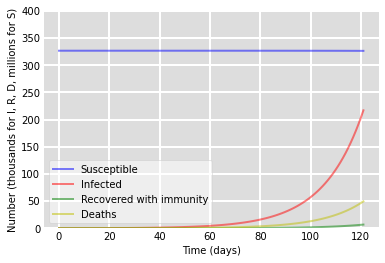

In [92]:
# Run SIRD for US
N = popUS
I0 = 100
R0 = 0
D0 = 0
S0 = N - I0 - R0 - D0

days = 121
rec = 0.002
death = 0.0145
beta = 0.08

# Init parameters for optimization
params = Parameters()
params.add('beta', value=beta, min=0, max=5)
params.add('rec', value=rec, min=0, max=5)
params.add('death', value=death, min=0, max=5)

t = np.linspace(0, days, days)
y0 = S0, I0, R0, D0

# Integrate equations over t
def ode_sol(t, init, params):
    beta, rec, death = params['beta'].value, params['rec'].value, params['death'].value
    out = odeint(SIRD, init, t, args=(beta, rec, death))
    return out

res = ode_sol(t, y0, params)
S, I, R, D = res.T

# Plot data on curves
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/1000, 'y', alpha=0.5, lw=2, label='Deaths')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (thousands for I, R, D, millions for S)')
ax.set_ylim(0,400)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [93]:
def SIRD(y, t, beta_func, rec, death):
    S, I, R, D = y
    N = S+I+R+D
    # Ordinary differential equations
    dS = (-beta_func(t, rec, death) * S * I)/N
    dI = ((beta_func(t, rec, death) * S * I)/N) - ((rec+death) * I)
    dR = rec * I
    dD = death * I
    return(dS, dI, dR, dD)

### Example with Logistic $R_t$ Value

In [94]:
r0_start = 5
r0_end = 0.5
k=0.5
x0 = 50

def logistic_R_0(t):
    return (r0_start-r0_end) / (1+np.exp(-k*(-t+x0))) + r0_end

def beta_func(t):
    return logistic_R_0(t)*rec

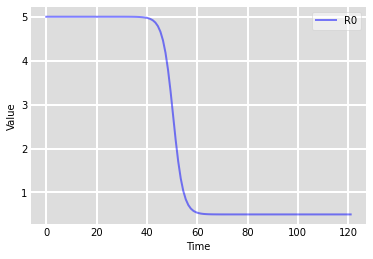

In [95]:
dyn_r0 = [logistic_R_0(i) for i in range(len(t))]
# Plot data on curves
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, dyn_r0, 'b', alpha=0.5, lw=2, label='R0')

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Fitting $R_t$ Value to Mobility/Policy Data

In [96]:
# Reformat data for easier plotting
scat_us = [0]*len(dates)

k=0
for i in usa:
    scat_us[k] = i[1]
    k=k+1
    
scat_us_S = [0]*len(dates)

k=0
for i in usa:
    scat_us_S[k] = i[0]
    k=k+1

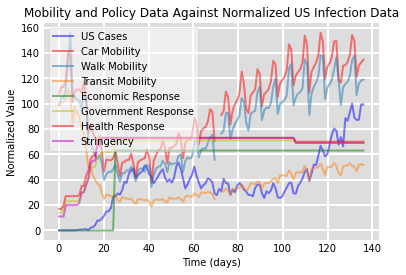

In [273]:
# Normalize US data and mobility data for plotting
a = [0]*len(scat_us)
amin, amax = min(scat_us), max(scat_us)
for i, val in enumerate(scat_us):
    a[i] = ((val-amin) / (amax-amin))*100

# Plot data on curves
days = 136
t = np.linspace(0, days, days)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, a, 'b', alpha=0.5, lw=2, label='US Cases')
ax.plot(t, mobility_car_us, 'r', alpha=0.5, lw=2, label='Car Mobility')
ax.plot(t, mobility_walk_us, alpha=0.5, lw=2, label='Walk Mobility')
ax.plot(t, mobility_trans_us, alpha=0.5, lw=2, label='Transit Mobility')
ax.plot(t, usEcon, 'g', alpha=0.5, lw=2, label='Economic Response')
ax.plot(t, usGov, 'y', alpha=0.5, lw=2, label='Government Response')
ax.plot(t, usHealth, 'r', alpha=0.5, lw=2, label='Health Response')
ax.plot(t, usString, 'm', alpha=0.5, lw=2, label='Stringency')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Normalized Value')
ax.set_title("Mobility and Policy Data Against Normalized US Infection Data")
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [98]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
X = pd.DataFrame({'TransitMob':mobility_trans_us, 'WalkMob': mobility_walk_us, 'CarMob' : mobility_car_us, 'EconInd':usEcon, 'HealthInd':usHealth, 'GovInd':usGov, 'StringencyInd':usString})

# Take the average for the missing data so there is no gap
# Not the best method, but a workaround for now so I don't
# need to remove May 11-12 from all the datasets
X['CarMob'][70] = ((mobility_car_us[69]+mobility_car_us[72])/2)
X['CarMob'][71] = ((mobility_car_us[69]+mobility_car_us[72])/2)
X['WalkMob'][70] = ((mobility_walk_us[69]+mobility_walk_us[72])/2)
X['WalkMob'][71] = ((mobility_walk_us[69]+mobility_walk_us[72])/2)
X['TransitMob'][70] = ((mobility_trans_us[69]+mobility_trans_us[72])/2)
X['TransitMob'][71] = ((mobility_trans_us[69]+mobility_trans_us[72])/2)

y = a
regr.fit(X, y)

print(regr.coef_)

regr2 = linear_model.LinearRegression()
b = [0]*len(scat_us_S)
amin, amax = min(scat_us_S), max(scat_us_S)
for i, val in enumerate(scat_us_S):
    b[i] = ((val-amin) / (amax-amin))*100
y2 = b
regr2.fit(X, y2)
print(regr2.coef_)

[  0.55024918   0.14168577  -0.24940132  -5.22919552 -31.37044624
  39.49450902  -1.05956546]
[ -0.42526565   0.07861073  -0.56308433   3.16319512  18.27060348
 -23.95451648   0.76968015]


In [99]:
def reg_R0(t):
    t = math.floor(t)
    yHatS = regr2.predict([[X['TransitMob'][t], X['WalkMob'][t], X['CarMob'][t], usEcon[t], usHealth[t], usGov[t], usString[t]]])
  
    yHat = regr.predict([[X['TransitMob'][t], X['WalkMob'][t], X['CarMob'][t], usEcon[t], usHealth[t], usGov[t], usString[t]]])
    if t == 0:
        return r0_start
    else:
        dIHat = regr.predict([[X['TransitMob'][t-1], X['WalkMob'][t-1], X['CarMob'][t-1], usEcon[t-1], usHealth[t-1], usGov[t-1], usString[t-1]]])

    out = ((dIHat/100 - ((rec+death)*(yHat/100))))/((yHat/100) * (yHatS/100))
    if out < 0:
        out = 0
    elif out > 10:
        out = 10
    return out

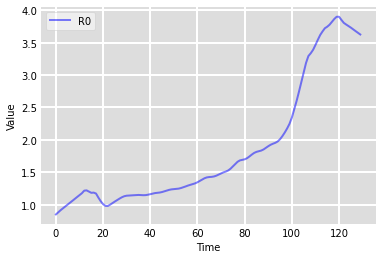

In [101]:
# Plot the dynamic R0 value
dyn_r0 = [reg_R0(i) for i in range(len(t))]

from statsmodels.nonparametric.smoothers_lowess import lowess as lowess
t = list(range(0,130,1))

ss1 = lowess(dyn_r0, t, frac=0.12)
#print(ss1[:10,:]) # We get back smoothed y value for each x value in the data

plot_r0 = []
for i in ss1:
    plot_r0.append(i[1])

# Plot data on curves
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, plot_r0, 'b', alpha=0.5, lw=2, label='R0')

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

If there's an exog/edog error in the cell above, try rerunning.

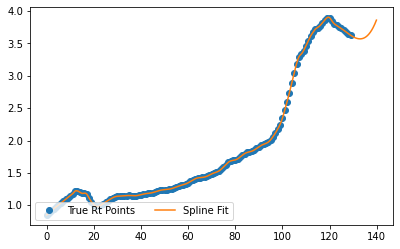

In [102]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.arange(len(plot_r0))
y = plot_r0

cs = CubicSpline(x, y)
xs = np.arange(0, 140, 0.1)
plt.figure(figsize=(6.5, 4))
plt.plot(x, y, 'o', label='True Rt Points')
plt.plot(xs, cs(xs), label="Spline Fit")
plt.legend(loc='lower left', ncol=2)
plt.show()

# Run SIRD Model Using $R_t$ Value

In [103]:
x = np.arange(len(plot_r0))
y = plot_r0
cs = CubicSpline(x, y)

def beta_func(t, recov, dea):
    return cs(t)*(recov+dea)

# Run SIRD for US
N = popUS
I0 = 100
R0 = 0
D0 = 0
S0 = N - I0 - R0 - D0

days = 129
rec = 0.05
death = 0.0145

# Init parameters for optimization
params = Parameters()
params.add('rec', value=rec, min=0, max=0.4)
params.add('death', value=death, min=0, max=0.4)

t = np.linspace(0, days, days)

y0 = S0, I0, R0, D0

# Integrate equations over t
def ode_sol(t, init, params, beta_func):

    rec, death = params['rec'].value, params['death'].value
    out = odeint(SIRD, init, t, args=(beta_func, rec, death))
    return out

def error(param, init, tspan, data, beta_func):
    sol = ode_sol(tspan, init, param, beta_func)

    return (sol[:, 0:4] - data).ravel()

data =  usa[0:days]
init = [S0, I0, R0, D0]
tspan = np.arange(0, days, 1)
result = minimize(error, params, args=(y0, tspan, data, beta_func), method='leastsq')
res = ode_sol(t, y0, result.params, beta_func)
S, I, R, D = res.T
print(result.params)

Parameters([('rec', <Parameter 'rec', value=0.05 +/- 0.0631, bounds=[0:0.4]>), ('death', <Parameter 'death', value=0.014500000000000002 +/- 0.158, bounds=[0:0.4]>)])


In [104]:
# Plot daily cases for United States
days = 129
printUSS = [0]*days
printUSI = [0]*days
printUSR = [0]*days
printUSD = [0]*days
k=0

for i in usa[0:129]:
    printUSS[k] = i[0]/1000000
    printUSI[k] = i[1]/1000
    printUSR[k] = i[2]/1000
    printUSD[k] = i[3]/1000
    k+=1

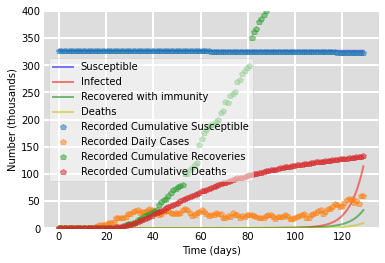

In [105]:
# Plot data on curves
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/1000, 'y', alpha=0.5, lw=2, label='Deaths')
ax.plot(t, printUSS, 'p', alpha=0.5, lw=2, label='Recorded Cumulative Susceptible')
ax.plot(t, printUSI, 'p', alpha=0.5, lw=2, label='Recorded Daily Cases')
ax.plot(t, printUSR, 'p', alpha=0.5, lw=2, label='Recorded Cumulative Recoveries')
ax.plot(t, printUSD, 'p', alpha=0.5, lw=2, label='Recorded Cumulative Deaths')
ax.set_xlabel('Time (days)')
ax.set_ylabel('Number (thousands)')
ax.set_ylim(0,400)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Using $R_t$ From Rt.Live

In [106]:
def SIRD(y, t, beta_func, rec, death):
    S, I, R, D = y
    N = S+I+R+D
    # Ordinary differential equations
    dS = (-beta_func(t, rec, death) * S * I)/N
    dI = ((beta_func(t, rec, death) * S * I)/N) - ((rec+death) * I)
    dR = rec * I
    dD = death * I
    return(dS, dI, dR, dD)

In [107]:
# Integrate equations over t
def ode_sol(t, init, params, beta_func):

    rec, death = params['rec'].value, params['death'].value
    out = odeint(SIRD, init, t, args=(beta_func, rec, death))
    return out

In [108]:
rt = pd.read_csv("rt.csv")
states = list(set(rt.region))
states.pop(30)

# Run SIRD for US
N = popUS
I0 = 10
R0 = 0
D0 = 0
S0 = N - I0 - R0 - D0

y0 = S0, I0, R0, D0 

rec = 0.05
death = 0.0145

# Init parameters for optimization
params = Parameters()
params.add('rec', value=rec, min=0, max=0.4)
params.add('death', value=death, min=0, max=0.4)

In [109]:
def error(param, init, tspan, data, beta_func):
    sol = ode_sol(tspan, init, param, beta_func)

    return (sol[:, 0:4] - data).ravel()

In [110]:
stat_abrev = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [111]:
stat_dat = []

for j in states:
    tempCases = df.loc[(df['Province_State'] == stat_abrev[j])]
    tempDeaths = dfDeaths.loc[(dfDeaths['Province_State'] == stat_abrev[j])]

    x = []
    k=0
    tempI = 0
    tempD = 0
    tempR = 0
    for i in dates:
        usaI = sum(tempCases[i]) - tempI
        usaD = sum(tempDeaths[i]) - tempD
        # Cumulative deaths, daily cases
        tempusaI = sum(tempCases[i])
        tempusaD = sum(tempDeaths[i])
        insert = usaI
        x.append(insert)
        tempI = tempusaI
        tempD = tempusaD
        k += 1 

    stat_dat.append(x) 
    
print(stat_dat[0])

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 3, 0, 7, 0, 1, 9, 7, 20, 3, 23, 20, 30, 33, 26, 27, 24, 21, 37, 28, 17, 51, 72, 51, 31, 32, 30, 23, 51, 32, 16, 21, 4, 7, 15, 5, 24, 10, 3, 2, 5, 2, 2, 16, 8, 4, 7, 0, 4, 13, 7, 11, 5, 5, 1, 8, 3, 2, 6, -1, 1, 2, 3, 1, 1, 6, 0, 4, 0, 6, 2, 2, 2, 6, 5, 4, 3, 1, 2, 4, 2, 5, 2, 36, 1, 19, 17, 12, 9, 11, 15, 9, 6, 2, 1, 3, -1, 5, 9, 3, 12, 4, 1, 20, 7, 7, 2, 2, 6, 0, 2, 17, 9, 2, 11, 2, 3, 2, 16, 5, 6, 13, 5, 4, 13]


# Calculate US $R_t$ Based Off Proportions of Cases

In [112]:
proportions = {}
for h in states:
    proportions[h] = []

# Calculate the proportions of cases from each state
p = 0
for m in states:
    scat_us = [0]*len(dates)
    k=0
    for i in usa:
        x = stat_dat[p][k]/i[1]
        k=k+1
        proportions[m].append(x)
        
    p = p + 1

In [113]:
# Now we must the find weight average of Rt value for each state
us_rt = [0]*len(usa)
for t in range(len(states)):
    z = rt[rt["region"] == states[t]]
    
    q = 0
    for g in z['mean']:
        if q > 135:
            break
        us_rt[q] = us_rt[q] + (g * proportions[states[t]][q])
        q = q + 1
        
for v in us_rt:
    v = v/50

### US $R_t$ Curve

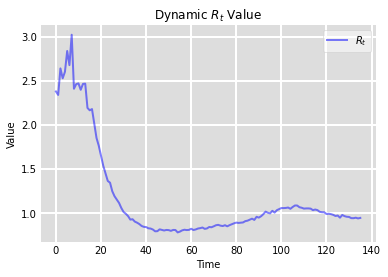

In [114]:
# Plot data on curves
t = list(range(0,136,1))
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, us_rt, 'b', alpha=0.5, lw=2, label='$R_t$')

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title("Dynamic $R_t$ Value")
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Generate CSV Predictions

In [115]:
from scipy.interpolate import CubicSpline

# Use a spline fit algorithm to allow for continuous t inputs
x = np.arange(len(us_rt))
y = us_rt
cs = CubicSpline(x, y)

def beta_func(t, recov, dea):
    return cs(t)*(recov+dea)

print(params)

Parameters([('rec', <Parameter 'rec', value=0.05, bounds=[0:0.4]>), ('death', <Parameter 'death', value=0.0145, bounds=[0:0.4]>)])


Warning! The following two cells can take 10 to 30 minutes to run combined. It will print a decimal progress indicator, where 1 represents complete.

In [116]:
# Fit model to United States with different prediction start dates

I0 = 100
R0 = 0
N0 = popUS
D0 = 0
S0 = N0 - I0 - R0 - D0
init = [S0, I0, R0, D0]

# Init empty predictions dictionary
predictions = {}

print("Progress: ", end="")
for i in range(91, len(dates)-7):
    days = i
    tspan = np.arange(0, days, 1)
    data =  usa[0:days]
    
    print(round((i-90)/(45-7), 2), end=", ")
    # Fit the model
    result = minimize(error, params, args=(init, tspan, data, beta_func), method='leastsq')
    
    days = i + 7
    t = np.linspace(0, days, days)
    
    y0 = S0, I0, R0, D0
    res = ode_sol(t, y0, result.params, beta_func)
    S, I, R, D = res.T
    
    # Add these prediction infected values into dictionary
    predictions[dates[i]] = I[(days-7):days]

Progress: 0.03, 0.05, 0.08, 0.11, 0.13, 0.16, 0.18, 0.21, 0.24, 0.26, 0.29, 0.32, 0.34, 0.37, 0.39, 0.42, 0.45, 0.47, 0.5, 0.53, 0.55, 0.58, 0.61, 0.63, 0.66, 0.68, 0.71, 0.74, 0.76, 0.79, 0.82, 0.84, 0.87, 0.89, 0.92, 0.95, 0.97, 1.0, 

In [117]:
predic_2 = {}

print("Progress: ", end="")
for i in range(91, len(dates)-14):
    days = i
    tspan = np.arange(0, days, 1)
    data =  usa[0:days]

    print(round((i-90)/(45-14), 2), end=", ")
    # Fit the model
    result = minimize(error, params, args=(init, tspan, data, beta_func), method='leastsq')
    
    days = i + 14
    t = np.linspace(0, days, days)

    y0 = S0, I0, R0, D0
    res = ode_sol(t, y0, result.params, beta_func)
    S, I, R, D = res.T

    # Add these prediction infected values into dictionary
    predic_2[dates[i]] = I[(days-14):days]

Progress: 0.03, 0.06, 0.1, 0.13, 0.16, 0.19, 0.23, 0.26, 0.29, 0.32, 0.35, 0.39, 0.42, 0.45, 0.48, 0.52, 0.55, 0.58, 0.61, 0.65, 0.68, 0.71, 0.74, 0.77, 0.81, 0.84, 0.87, 0.9, 0.94, 0.97, 1.0, 

### Visualization of Spline Fit of $R_t$ Values

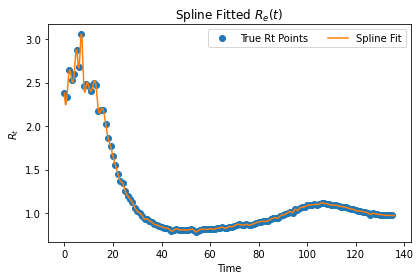

In [280]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.arange(len(us_rt))
y = us_rt

cs = CubicSpline(x, y)
xs = np.arange(0, 136, 0.1)
plt.figure(figsize=(6.5, 4))
plt.xlabel("Time")
plt.ylabel("$R_t$")
plt.title("Spline Fitted $R_e(t)$")
plt.plot(x, y, 'o', label='True Rt Points')
plt.plot(xs, cs(xs), label="Spline Fit")
plt.legend(loc='upper right', ncol=2)
plt.show()

### Place Data into Correct CSVs

In [73]:
from datetime import datetime

# Put all the data into the desired format
quant = []
loca = []
targ = []
forc = []
poin = []
end_date = []
keys = []
keys_2 = []

for key, value in predictions.items():
    keys.append(key)
    
for key, value in predic_2.items():
    keys_2.append(key)

forc_keys = keys + ["7/16/20", "7/17/20", "7/18/20", "7/19/20", "7/20/20", "7/21/20", "7/22/20"]
forc_keys_2 = keys + ["7/16/20", "7/17/20", "7/18/20", "7/19/20", "7/20/20", "7/21/20", "7/22/20","7/23/20", "7/24/20", "7/25/20", "7/26/20", "7/27/20", "7/28/20", "7/29/20"]
    
# Loop through and situate everything correctly
j = 0
for i in range(len(keys)):
    x = datetime.strptime(keys[i], '%m/%d/%y')
    forc_date = x.strftime('%Y-%m-%d')
    point_date = keys[i]
    for k in range(7):
        quant.append("NA")
        loca.append("US")
        targ.append("1 wk ahead inc case")
        forc.append(forc_date)
        # Make sure point predictions are end dates are iterated
        poin.append(predictions[point_date][k])
        y = datetime.strptime(forc_keys[j+k], '%m/%d/%y')
        end_date.append(y.strftime('%Y-%m-%d'))
    
    if i < len(keys_2):
        for s in range(14):
            quant.append("NA")
            loca.append("US")
            targ.append("2 wk ahead inc case")
            forc.append(forc_date)
            # Make sure point predictions are end dates are iterated
            poin.append(predic_2[point_date][s])
            y = datetime.strptime(forc_keys_2[j+s], '%m/%d/%y')
            end_date.append(y.strftime('%Y-%m-%d'))

    j = j + 1
        
# Instantiate the output CSV dictionary
output_csv = {"location" : loca, 
              "target" : targ,
             "target_end_date" : end_date,
             "forecast_date" : forc,
             "point" : poin,
             "quantile" : quant}

# convert to pandas dataframe for easy transfer to CSV
out = pd.DataFrame(output_csv)

In [74]:
# Iterate through and create separate CSV files for each forecast date
# Also reformat dates to correct format
for i in dates[91:len(dates)]:
    z = datetime.strptime(i, '%m/%d/%y')
    z_date = z.strftime('%Y-%m-%d')
    to_file = out[out["forecast_date"] == z_date]
    to_file.to_csv(f'{z_date}-SIRD-rt-live.csv', index=False) 

In [84]:
# Example of one of the CSV files
out[out["forecast_date"] == "2020-07-05"]

,location,target,target_end_date,forecast_date,point,quantile
672,US,1 wk ahead inc case,2020-07-05,2020-07-05,22327.145717,NA
673,US,1 wk ahead inc case,2020-07-06,2020-07-05,22102.907072,NA
674,US,1 wk ahead inc case,2020-07-07,2020-07-05,21958.667253,NA
675,US,1 wk ahead inc case,2020-07-08,2020-07-05,21734.952279,NA
676,US,1 wk ahead inc case,2020-07-16,2020-07-05,21501.401584,NA
677,US,1 wk ahead inc case,2020-07-17,2020-07-05,21226.710576,NA
678,US,1 wk ahead inc case,2020-07-18,2020-07-05,20911.597142,NA
